# Data Wrangling - Proyecto Predicción de Ventas e Inventario
Este notebook contiene las transformaciones necesarias para limpiar los datos, con explicaciones claras de cada paso y la justificación de las decisiones tomadas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Carga de Datos
Se cargan los archivos CSV desde el sistema contable ERP (SAP).

In [2]:
raw_categoria_productos = pd.read_csv('../datasets/raw/ProductCategories.csv')
raw_productos = pd.read_csv('../datasets/raw/Products.csv')
raw_orden_ventas_item = pd.read_csv('../datasets/raw/SalesOrderItems.csv')
raw_orden_ventas = pd.read_csv('../datasets/raw/SalesOrders.csv')

### Eliminación de Duplicados
Se eliminan filas duplicadas para evitar distorsionar análisis.

In [3]:
def eda(df, nombre, id='id'):
    print(f'EDA de {nombre} \n')
    print('Primeras filas:')
    print(df.head())
    print()
    
    print(df.info())
    print()

    print('Filas enteras repeditas:', df.duplicated().sum())
    print()

    print('Filas con id repetido:', df.duplicated(id).sum())
    print()

    print('Valores ausentes:')
    print(df.isna().sum())
    print()

## SalesOrderItems

In [4]:
eda(raw_orden_ventas_item, "raw_orden_ventas_item", "PRODUCTID")

EDA de raw_orden_ventas_item 

Primeras filas:
   SALESORDERID  SALESORDERITEM PRODUCTID NOTEID CURRENCY  GROSSAMOUNT  \
0     500000000              10   MB-1034             USD         2499   
1     500000000              20   CB-1161             USD          399   
2     500000001              10   HB-1175             USD          899   
3     500000001              20   RC-1056             USD         2499   
4     500000001              30   CC-1021             USD         1144   

   NETAMOUNT  TAXAMOUNT ITEMATPSTATUS  OPITEMPOS  QUANTITY QUANTITYUNIT  \
0   2186.625    312.375             I        NaN         4           EA   
1    349.125     49.875             I        NaN         9           EA   
2    786.625    112.375             I        NaN         2           EA   
3   2186.625    312.375             I        NaN         2           EA   
4   1001.000    143.000             I        NaN         3           EA   

   DELIVERYDATE  
0      20180311  
1      20180311  
2  

Limpieza de datos. Eliminacion de columnas vacias o irrelevantes

### Eliminación de Columnas o Filas
Se eliminan columnas innecesarias, vacías o irrelevantes para el análisis o modelado.

In [5]:
columnas_vacias = raw_orden_ventas_item.columns[raw_orden_ventas_item.isna().all()]
print(f'Columnas completamente vacías eliminadas: {list(columnas_vacias)}')
raw_orden_ventas_item.drop(columns=columnas_vacias, inplace=True)

Columnas completamente vacías eliminadas: ['OPITEMPOS']


In [6]:
print(raw_orden_ventas_item)

      SALESORDERID  SALESORDERITEM PRODUCTID NOTEID CURRENCY  GROSSAMOUNT  \
0        500000000              10   MB-1034             USD         2499   
1        500000000              20   CB-1161             USD          399   
2        500000001              10   HB-1175             USD          899   
3        500000001              20   RC-1056             USD         2499   
4        500000001              30   CC-1021             USD         1144   
...            ...             ...       ...    ...      ...          ...   
1925     500000333              10   MB-1031             USD          649   
1926     500000333              20   BX-1013             USD          449   
1927     500000333              30   EB-1132             USD         1900   
1928     500000333              40   BX-1011             USD          249   
1929     500000333              50   BX-1015             USD          299   

      NETAMOUNT  TAXAMOUNT ITEMATPSTATUS  QUANTITY QUANTITYUNIT  DELIVERYDA

Procedo a eliminar columnas irrelevantes ['QUANTITYUNIT', 'NOTEID', 'TAXAMOUNT', 'ITEMATPSTATUS', 'GROSSAMOUNT']


### Eliminación de Columnas o Filas
Se eliminan columnas innecesarias, vacías o irrelevantes para el análisis o modelado.

In [7]:
columnas_a_eliminar = ['QUANTITYUNIT', 'NOTEID', 'TAXAMOUNT', 'ITEMATPSTATUS', 'GROSSAMOUNT','CURRENCY' ]
raw_orden_ventas_item.drop(columns=columnas_a_eliminar, errors='ignore', inplace=True)
print(f'Se eliminaron las columnas: {columnas_a_eliminar}')

Se eliminaron las columnas: ['QUANTITYUNIT', 'NOTEID', 'TAXAMOUNT', 'ITEMATPSTATUS', 'GROSSAMOUNT', 'CURRENCY']


In [8]:
print(raw_orden_ventas_item)

      SALESORDERID  SALESORDERITEM PRODUCTID  NETAMOUNT  QUANTITY  \
0        500000000              10   MB-1034   2186.625         4   
1        500000000              20   CB-1161    349.125         9   
2        500000001              10   HB-1175    786.625         2   
3        500000001              20   RC-1056   2186.625         2   
4        500000001              30   CC-1021   1001.000         3   
...            ...             ...       ...        ...       ...   
1925     500000333              10   MB-1031    567.875        10   
1926     500000333              20   BX-1013    392.875         3   
1927     500000333              30   EB-1132   1662.500         3   
1928     500000333              40   BX-1011    217.875         5   
1929     500000333              50   BX-1015    261.625         6   

      DELIVERYDATE  
0         20180311  
1         20180311  
2         20180228  
3         20180228  
4         20180228  
...            ...  
1925      20190709  
192

Se convierte la columna DELIVERYDATE a fecha

### Conversión de Fechas
Se transforma texto a formato de fecha para permitir análisis temporal.

In [9]:
raw_orden_ventas_item['DELIVERYDATE'] = pd.to_datetime(raw_orden_ventas_item['DELIVERYDATE'], format='%Y%m%d', errors='coerce')

In [10]:
print(raw_orden_ventas_item)

      SALESORDERID  SALESORDERITEM PRODUCTID  NETAMOUNT  QUANTITY DELIVERYDATE
0        500000000              10   MB-1034   2186.625         4   2018-03-11
1        500000000              20   CB-1161    349.125         9   2018-03-11
2        500000001              10   HB-1175    786.625         2   2018-02-28
3        500000001              20   RC-1056   2186.625         2   2018-02-28
4        500000001              30   CC-1021   1001.000         3   2018-02-28
...            ...             ...       ...        ...       ...          ...
1925     500000333              10   MB-1031    567.875        10   2019-07-09
1926     500000333              20   BX-1013    392.875         3   2019-07-09
1927     500000333              30   EB-1132   1662.500         3   2019-07-09
1928     500000333              40   BX-1011    217.875         5   2019-07-09
1929     500000333              50   BX-1015    261.625         6   2019-07-09

[1930 rows x 6 columns]


Relleno de datos nulos con la media

### Imputación de Valores Faltantes
Se reemplazan valores nulos por la media o mediana, según la variable, para evitar perder registros valiosos.

In [11]:
for col in ['QUANTITY', 'NETAMOUNT']:
    if raw_orden_ventas_item[col].isna().sum() > 0:
        raw_orden_ventas_item[col].fillna(raw_orden_ventas_item[col].median(), inplace=True)
        print(f'Nulos en {col} imputados con la mediana.')

Se crea la columna PRECIOUNITARIO, basado en la cantidad y precio neto del producto

### Cálculo del Precio Unitario
Se calcula el precio unitario dividiendo el monto neto por la cantidad.

In [12]:
raw_orden_ventas_item['PRECIO_UNITARIO'] = raw_orden_ventas_item['NETAMOUNT'] / raw_orden_ventas_item['QUANTITY']

In [13]:
print(raw_orden_ventas_item)

      SALESORDERID  SALESORDERITEM PRODUCTID  NETAMOUNT  QUANTITY  \
0        500000000              10   MB-1034   2186.625         4   
1        500000000              20   CB-1161    349.125         9   
2        500000001              10   HB-1175    786.625         2   
3        500000001              20   RC-1056   2186.625         2   
4        500000001              30   CC-1021   1001.000         3   
...            ...             ...       ...        ...       ...   
1925     500000333              10   MB-1031    567.875        10   
1926     500000333              20   BX-1013    392.875         3   
1927     500000333              30   EB-1132   1662.500         3   
1928     500000333              40   BX-1011    217.875         5   
1929     500000333              50   BX-1015    261.625         6   

     DELIVERYDATE  PRECIO_UNITARIO  
0      2018-03-11       546.656250  
1      2018-03-11        38.791667  
2      2018-02-28       393.312500  
3      2018-02-28      

Redondeo de PRECIO_UNITARIO & NETAMOUNT a dos decimales

### Redondeo
Se redondean valores numéricos como montos o precios para facilitar la interpretación.

In [14]:
raw_orden_ventas_item['NETAMOUNT'] = raw_orden_ventas_item['NETAMOUNT'].round(2)
raw_orden_ventas_item['PRECIO_UNITARIO'] = raw_orden_ventas_item['PRECIO_UNITARIO'].round(2)

In [15]:
print(raw_orden_ventas_item)

      SALESORDERID  SALESORDERITEM PRODUCTID  NETAMOUNT  QUANTITY  \
0        500000000              10   MB-1034    2186.62         4   
1        500000000              20   CB-1161     349.12         9   
2        500000001              10   HB-1175     786.62         2   
3        500000001              20   RC-1056    2186.62         2   
4        500000001              30   CC-1021    1001.00         3   
...            ...             ...       ...        ...       ...   
1925     500000333              10   MB-1031     567.88        10   
1926     500000333              20   BX-1013     392.88         3   
1927     500000333              30   EB-1132    1662.50         3   
1928     500000333              40   BX-1011     217.88         5   
1929     500000333              50   BX-1015     261.62         6   

     DELIVERYDATE  PRECIO_UNITARIO  
0      2018-03-11           546.66  
1      2018-03-11            38.79  
2      2018-02-28           393.31  
3      2018-02-28      

Eliminacion de outliers usando los quartiles IQR

In [16]:
Q1 = raw_orden_ventas_item['QUANTITY'].quantile(0.25)
Q3 = raw_orden_ventas_item['QUANTITY'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

raw_orden_ventas_item = raw_orden_ventas_item[
    (raw_orden_ventas_item['QUANTITY'] >= limite_inferior) &
    (raw_orden_ventas_item['QUANTITY'] <= limite_superior)
]
print('Filtrado de outliers en QUANTITY completado.')

Filtrado de outliers en QUANTITY completado.


## SALES ORDERS


In [17]:
eda(raw_orden_ventas, "raw_orden_ventas", "SALESORDERID")

EDA de raw_orden_ventas 

Primeras filas:
   SALESORDERID  CREATEDBY  CREATEDAT  CHANGEDBY  CHANGEDAT FISCVARIANT  \
0     500000000          4   20180111          4   20180116          K4   
1     500000001          2   20180112          2   20180115          K4   
2     500000002          5   20180115          5   20180120          K4   
3     500000003          3   20180115          3   20180120          K4   
4     500000004          8   20180116          8   20180117          K4   

   FISCALYEARPERIOD  NOTEID  PARTNERID SALESORG CURRENCY  GROSSAMOUNT  \
0           2018001     NaN  100000022      APJ      USD        13587   
1           2018001     NaN  100000026     EMEA      USD        12622   
2           2018001     NaN  100000018      APJ      USD        45655   
3           2018001     NaN  100000009     EMEA      USD       101786   
4           2018001     NaN  100000025     EMEA      USD        71684   

   NETAMOUNT  TAXAMOUNT LIFECYCLESTATUS BILLINGSTATUS DELIVERYSTATUS

Cambio de valores a fechas

### Conversión de Fechas
Se transforma texto a formato de fecha para permitir análisis temporal.

In [18]:
raw_orden_ventas['CREATEDAT'] = pd.to_datetime(raw_orden_ventas['CREATEDAT'], format='%Y%m%d', errors='coerce')
raw_orden_ventas['CHANGEDAT'] = pd.to_datetime(raw_orden_ventas['CHANGEDAT'], format='%Y%m%d', errors='coerce')

Eliminación de columnas vacias o irrelevantes

### Eliminación de Columnas o Filas
Se eliminan columnas innecesarias, vacías o irrelevantes para el análisis o modelado.

In [19]:
columnas_vacias = raw_orden_ventas.columns[raw_orden_ventas.isna().all()].tolist()
columnas_irrelevantes = [
    'CURRENCY', 'NOTEID', 'FISCALYEARPERIOD', 'SALESORG', 'PARTNERID',
    'FISCVARIANT', 'CHANGEDBY', 'CHANGEDAT', 'GROSSAMOUNT', 'TAXAMOUNT',
    'LIFECYCLESTATUS', 'BILLINGSTATUS', 'DELIVERYSTATUS'
]
columnas_a_eliminar = list(set(columnas_vacias + columnas_irrelevantes))
raw_orden_ventas.drop(columns=columnas_a_eliminar, errors='ignore', inplace=True)
print(f'Se eliminaron columnas: {columnas_a_eliminar}')

Se eliminaron columnas: ['SALESORG', 'TAXAMOUNT', 'FISCALYEARPERIOD', 'BILLINGSTATUS', 'CHANGEDBY', 'DELIVERYSTATUS', 'NOTEID', 'FISCVARIANT', 'PARTNERID', 'CURRENCY', 'CHANGEDAT', 'LIFECYCLESTATUS', 'GROSSAMOUNT']


Relleno de valores NAN con la media y redondeo de los datos float. 

### Imputación de Valores Faltantes
Se reemplazan valores nulos por la media o mediana, según la variable, para evitar perder registros valiosos.

In [20]:
if raw_orden_ventas['NETAMOUNT'].isna().sum() > 0:
    raw_orden_ventas['NETAMOUNT'].fillna(raw_orden_ventas['NETAMOUNT'].mean(), inplace=True)
raw_orden_ventas['NETAMOUNT'] = raw_orden_ventas['NETAMOUNT'].round(2)

In [21]:
print(raw_orden_ventas)

     SALESORDERID  CREATEDBY  CREATEDAT  NETAMOUNT
0       500000000          4 2018-01-11   11888.62
1       500000001          2 2018-01-12   11044.25
2       500000002          5 2018-01-15   39948.12
3       500000003          3 2018-01-15   89062.75
4       500000004          8 2018-01-16   62723.50
..            ...        ...        ...        ...
329     500000329          7 2019-06-19   79293.38
330     500000330         11 2019-06-22   99637.12
331     500000331          3 2019-06-25   11106.38
332     500000332         13 2019-06-27   61712.00
333     500000333          5 2019-06-27   14504.00

[334 rows x 4 columns]


## Products


In [22]:
eda(raw_productos, "raw_productos", "PRODUCTID")

EDA de raw_productos 

Primeras filas:
  PRODUCTID TYPECODE PRODCATEGORYID  CREATEDBY  CREATEDAT  CHANGEDBY  \
0   RO-1001       PR             RO          9   20181003          9   
1   RO-1002       PR             RO          9   20181003          9   
2   RO-1003       PR             RO         12   20181003         12   
3   BX-1011       PR             BX          9   20181003          9   
4   BX-1012       PR             BX          6   20181003          6   

   CHANGEDAT  SUPPLIER_PARTNERID  TAXTARIFFCODE QUANTITYUNIT  WEIGHTMEASURE  \
0   20181003           100000000              1           EA            7.7   
1   20181003           100000001              1           EA            8.0   
2   20181003           100000002              1           EA            9.1   
3   20181003           100000003              1           EA           11.1   
4   20181003           100000004              1           EA           12.0   

  WEIGHTUNIT CURRENCY  PRICE  WIDTH  DEPTH  HEIGHT  D

Eliminacion de columnas irrelevantes

### Eliminación de Columnas o Filas
Se eliminan columnas innecesarias, vacías o irrelevantes para el análisis o modelado.

In [23]:
columnas_a_eliminar = [
    'PRODUCTPICURL', 'WIDTH', 'DEPTH', 'HEIGHT', 'DIMENSIONUNIT',
    'SUPPLIER_PARTNERID', 'TAXTARIFFCODE', 'QUANTITYUNIT', 'WEIGHTMEASURE',
    'CHANGEDBY', 'CREATEDBY', 'TYPECODE', 'CHANGEDAT'
]
raw_productos.drop(columns=columnas_a_eliminar, errors='ignore', inplace=True)

Cambio de valores a fechas

### Conversión de Fechas
Se transforma texto a formato de fecha para permitir análisis temporal.

In [24]:
raw_productos['CREATEDAT'] = pd.to_datetime(raw_productos['CREATEDAT'], format='%Y%m%d', errors='coerce')

In [25]:
print(raw_productos)

   PRODUCTID PRODCATEGORYID  CREATEDAT WEIGHTUNIT CURRENCY  PRICE
0    RO-1001             RO 2018-10-03         KG      USD    525
1    RO-1002             RO 2018-10-03         KG      USD    689
2    RO-1003             RO 2018-10-03         KG      USD    721
3    BX-1011             BX 2018-10-03         KG      USD    249
4    BX-1012             BX 2018-10-03         KG      USD    399
5    BX-1013             BX 2018-10-03         KG      USD    449
6    BX-1014             BX 2018-10-03         KG      USD    799
7    BX-1015             BX 2018-10-03         KG      USD    299
8    BX-1016             BX 2018-10-03         KG      USD    319
9    CC-1021             CC 2018-10-03         KG      USD   1144
10   CC-1022             CC 2018-10-03         KG      USD   1200
11   CC-1023             CC 2018-10-03         KG      USD   1361
12   MB-1031             MB 2018-10-03         KG      USD    649
13   MB-1032             MB 2018-10-03         KG      USD   1299
14   MB-10

## ProductCategories

In [26]:
eda(raw_categoria_productos, "raw_categoria_productos", "PRODCATEGORYID")

EDA de raw_categoria_productos 

Primeras filas:
  PRODCATEGORYID  CREATEDBY  CREATEDAT
0             RO         12   20181003
1             BX          4   20181003
2             CC          7   20181003
3             MB         11   20181003
4             RC          9   20181003

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PRODCATEGORYID  9 non-null      object
 1   CREATEDBY       9 non-null      int64 
 2   CREATEDAT       9 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 348.0+ bytes
None

Filas enteras repeditas: 0

Filas con id repetido: 0

Valores ausentes:
PRODCATEGORYID    0
CREATEDBY         0
CREATEDAT         0
dtype: int64



Cambio de valores a fechas

### Conversión de Fechas
Se transforma texto a formato de fecha para permitir análisis temporal.

In [27]:
raw_categoria_productos['CREATEDAT'] = pd.to_datetime(raw_categoria_productos['CREATEDAT'], format='%Y%m%d', errors='coerce')

Eliminacino columnas irrelevantes

### Eliminación de Columnas o Filas
Se eliminan columnas innecesarias, vacías o irrelevantes para el análisis o modelado.

In [28]:
raw_categoria_productos.drop(columns=['CREATEDBY'], inplace=True)

In [29]:
print(raw_categoria_productos)

  PRODCATEGORYID  CREATEDAT
0             RO 2018-10-03
1             BX 2018-10-03
2             CC 2018-10-03
3             MB 2018-10-03
4             RC 2018-10-03
5             DB 2018-10-03
6             EB 2018-10-03
7             CB 2018-10-03
8             HB 2018-10-03


# Integración y Análisis de Tablas - Proyecto de Ventas e Inventario
Este notebook une las principales tablas del proyecto, genera variables clave para análisis y muestra visualizaciones agrupadas por producto, categoría y tiempo.

### Conversión de Fechas
Se transforma texto a formato de fecha para permitir análisis temporal.

In [30]:
raw_orden_ventas['CREATEDAT'] = pd.to_datetime(raw_orden_ventas['CREATEDAT'], format='%Y%m%d', errors='coerce')
raw_productos.rename(columns={'PRODCATEGORYID': 'PRODUCTCATEGORY'}, inplace=True)
raw_categoria_productos.rename(columns={'PRODCATEGORYID': 'PRODUCTCATEGORY'}, inplace=True)

raw_orden_ventas_item['PRECIO_UNITARIO'] = raw_orden_ventas_item['NETAMOUNT'] / raw_orden_ventas_item['QUANTITY']

df_completo = raw_orden_ventas_item.merge(raw_orden_ventas[['SALESORDERID', 'CREATEDAT']], on='SALESORDERID', how='left')
df_completo = df_completo.merge(raw_productos[['PRODUCTID', 'PRODUCTCATEGORY']], on='PRODUCTID', how='left')
df_completo = df_completo.merge(raw_categoria_productos[['PRODUCTCATEGORY']], on='PRODUCTCATEGORY', how='left')

df_completo['ANIO'] = df_completo['CREATEDAT'].dt.year
df_completo['MES'] = df_completo['CREATEDAT'].dt.month
df_completo['DIA_SEMANA'] = df_completo['CREATEDAT'].dt.day_name()

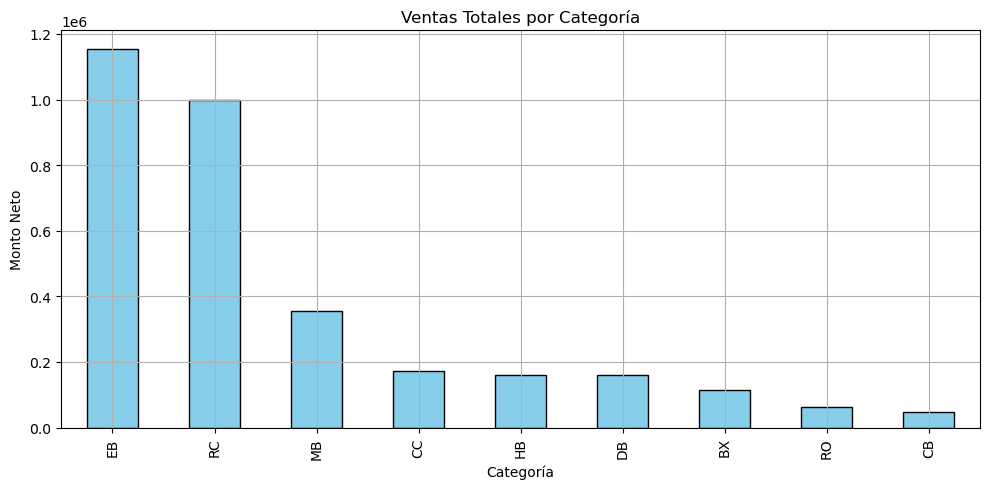

In [31]:
ventas_categoria = df_completo.groupby('PRODUCTCATEGORY')['NETAMOUNT'].sum().sort_values(ascending=False)
ventas_categoria.plot(kind='bar', figsize=(10, 5), color='skyblue', edgecolor='black')
plt.title('Ventas Totales por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Monto Neto')
plt.grid(True)
plt.tight_layout()
plt.show()

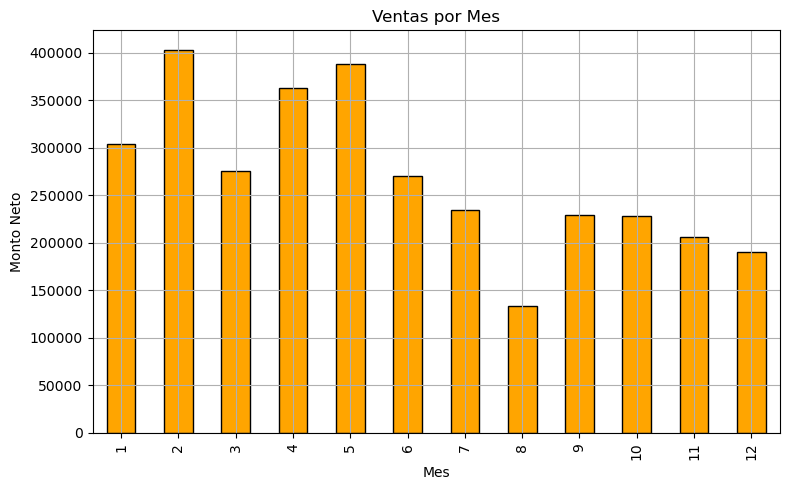

In [32]:
ventas_mes = df_completo.groupby('MES')['NETAMOUNT'].sum().sort_index()
ventas_mes.plot(kind='bar', figsize=(8, 5), color='orange', edgecolor='black')
plt.title('Ventas por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto Neto')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusión Final del DATA WRANGLING
El conjunto de datos está bien estructurado y tras la limpieza, se encuentra preparado para el siguiente paso. Se eliminaron columnas irrelevantes, se imputaron valores nulos con estrategias apropiadas, y se generaron variables derivadas útiles (como precio unitario).

La información obtenida en este proyecto sienta una base sólida para:

Entrenar modelos de predicción de ventas por producto o categoría.

Estimar la rotación de inventario.

Visualizar tendencias estacionales y de comportamiento del consumidor.